Playing around with the bifurcation diagram of a specific neuron model. 
Will want to see how autapses influence this. There are specific parameters to look into:
    - each variable separately (keep these biologically reasonable)
    - combination of variables (e.g. compare effective time (1/e + tau) vs each separately)
    - first return maps (over whole trial? or instant and steady-state?)

Heatmaps showing information content of ISI distribution versus autapse variables might be useful. 
It would be complement by some measure of the 'complexity' of the response (HMMs)

In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from functions import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define simulation params and neuron population.

RS = {'name': 'RS', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
      'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.0, 'f': 0.0, 'tau': 0.0}           # Class 1

RS_E = {'name': 'RS_E', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
        'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': 10.0, 'tau': 0.5}       # Class 1

RS_I = {'name': 'RS_I', 'C': 100, 'k': 0.7, 'v_r': -60, 'v_t': -40, 'v_peak': 35,
        'a': 0.03, 'b': -2, 'c': -50, 'd': 100, 'e': 0.03, 'f': -10.0, 'tau': 0.5}      # Class 1

IB = {'name': 'IB', 'C': 150, 'k': 1.2, 'v_r': -75, 'v_t': -45, 'v_peak': 50,
     'a': 0.01, 'b': 5, 'c': -56, 'd': 130, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

FS_E = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': 10.0, 'tau': 0.5}

FS_I = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': -10.0, 'tau': 0.5}


# Need one model for each driving current
N_models = 400

# will store all neuron params
params_list = []

# initial conditions
x_ini = np.array([-65, 0., 0.])
t_ini = 0.0
x_start = np.zeros((N_models, 3))
t_start = np.zeros(N_models)

# initialise params_list and initial conditions arrays
for i in range(N_models):
    params_list.append(FS)
    x_start[i] = x_ini
    t_start[i] = t_ini


# simulation parameters
# simulation duration
T = 2000        # ms
dt = 0.01       # ms
N_iter = int(T/dt)

I_low = 0.0     # pA
I_high = 400    # pA
I_range = np.linspace(0, 400, num = N_models)     # 0-400 is very large...

# define batch
batch = batchAQUA(params_list)
batch.Initialise(x_start, t_start)

In [3]:
# inject a step current of a given height after 50 ms adapting at start?
I_inj = np.array([step_current(N_iter, dt, 0.0, 50, i) for i in I_range])

# simulate batch
X, T, spikes = batch.update_batch(dt, N_iter, I_inj)


100%|██████████| 199999/199999 [02:03<00:00, 1616.05it/s]


[nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan na

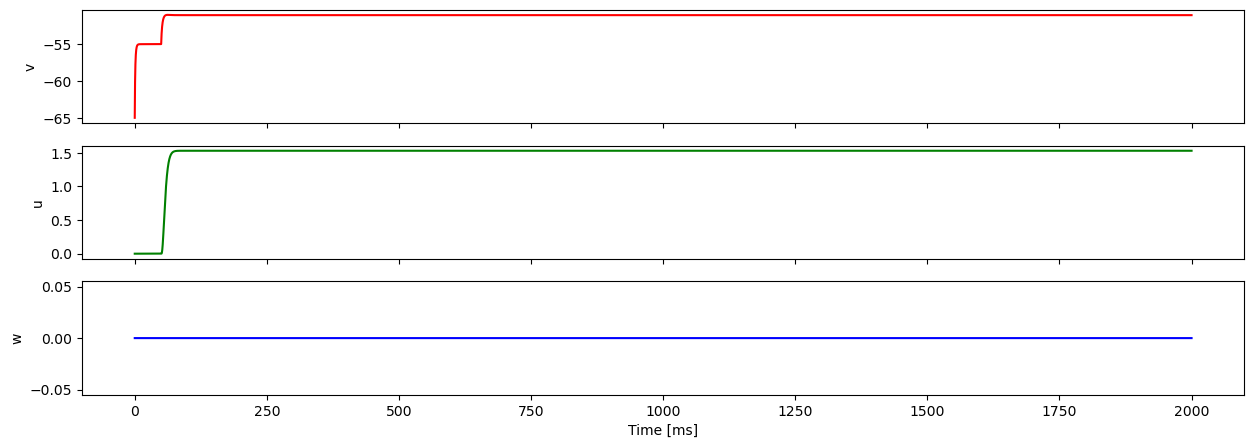

In [4]:
idx = 45
fig, ax = plot_membrane_variables(X[idx, :], T)
print(spikes[idx, :])

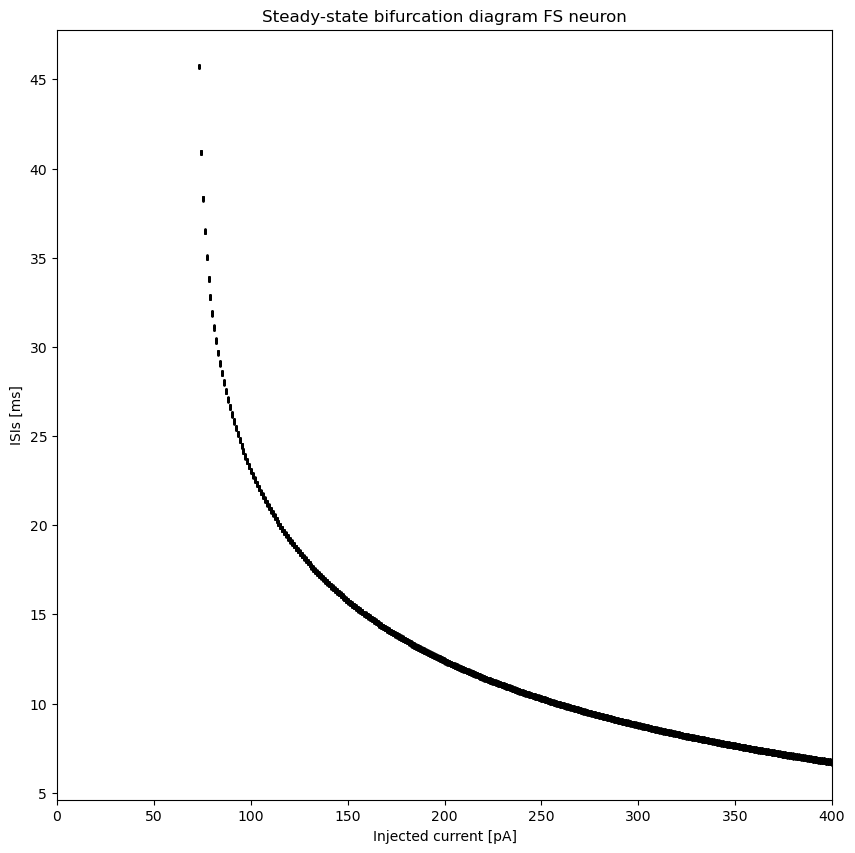

In [5]:
# plot bifurcation diagram
fig, ax = plot_bifurcation_I(spikes, I_range, steady_state = True)
ax.set_title(f"Steady-state bifurcation diagram {params_list[0]['name']} neuron")
ax.set_xlabel("Injected current [pA]")
ax.set_xlim(I_range[0], I_range[-1])

ax.set_ylabel("ISIs [ms]")

plt.savefig(f".\\bifurcations\\bifurcation_{params_list[0]['name']}.png")